In [1]:
!pip install torch torchvision

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
class EdgeDetectionCNN(nn.Module):
    def __init__(self):
        super(EdgeDetectionCNN, self).__init__()

        sobel_kernel_x = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        sobel_kernel_y = torch.tensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)

        # Combining kernels for both directions
        self.edge_kernel = torch.cat([sobel_kernel_x, sobel_kernel_y], dim=0)

        # Defining a convolution layer with predefined weights (no bias)
        self.conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, padding=1, bias=False)
        self.conv.weight = nn.Parameter(self.edge_kernel, requires_grad=False)

    def forward(self, x):
        x = self.conv(x)
        return x

In [5]:
def load_image(path):
    img = Image.open(path).convert('L')
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])
    return transform(img).unsqueeze(0)

In [6]:
def visualize_edge_detection(model, image_tensor):
    with torch.no_grad():
        edges = model(image_tensor)

    # Plotting original and edge-detected images
    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(image_tensor.squeeze(), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Horizontal Edges
    plt.subplot(1, 3, 2)
    plt.imshow(edges[0, 0].squeeze(), cmap='gray')
    plt.title('Horizontal Edges')
    plt.axis('off')

    # Vertical Edges
    plt.subplot(1, 3, 3)
    plt.imshow(edges[0, 1].squeeze(), cmap='gray')
    plt.title('Vertical Edges')
    plt.axis('off')

    plt.show()

In [7]:
edge_detection_cnn = EdgeDetectionCNN()

In [8]:
image_tensor = load_image("/content/naruto.png")

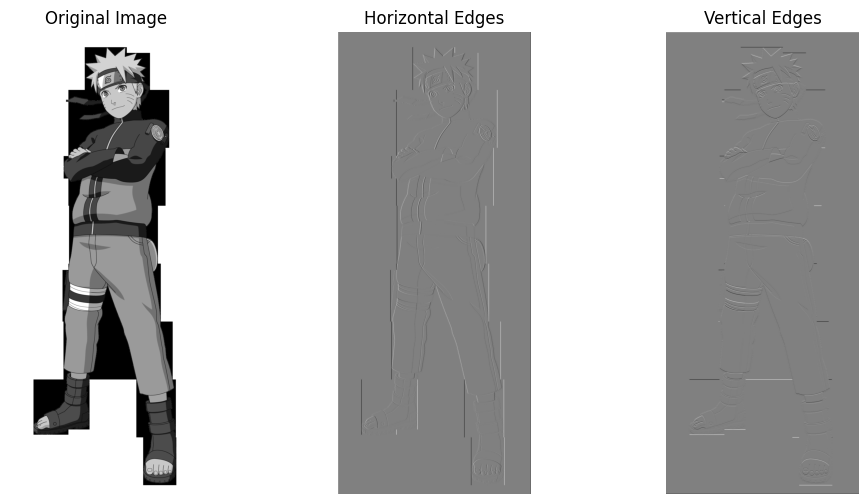

In [9]:
visualize_edge_detection(edge_detection_cnn, image_tensor)